In [1]:
import pandas as pd
from fancyimpute import KNN
import re
import pandas as pd
import xlsxwriter
import numpy as np

#grpx
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
# Defina o caminho para o arquivo train.csv
file_path = r'C:\Users\Kkk\3D Objects\HCT\train.csv'

# Leia o arquivo CSV
df = pd.read_csv(file_path)

# Exiba as primeiras linhas do dataframe
df.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [3]:
df.describe()

,ID,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,...,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
count,28800.000000,24180.000000,22971.000000,25530.000000,23516.000000,21637.000000,23601.000000,24603.000000,26000.000000,26157.000000,...,28800.000000,26410.000000,24712.00000,28323.000000,27930.00000,25147.000000,25448.000000,23736.000000,28800.000000,28800.000000
mean,14399.500000,1.764516,6.876801,5.143322,5.109202,8.617230,1.736876,5.160346,1.757808,1.715296,...,38.663162,1.709087,1.69962,1.702327,83.83208,6.903448,1.707128,8.664687,0.539306,23.237678
std,8313.988213,0.431941,1.564313,1.207757,1.214162,1.905125,0.447687,1.203240,0.435453,0.451282,...,21.147581,0.458259,0.46518,1.994443,11.02884,1.565017,0.461179,1.882746,0.498461,24.799748
min,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,...,0.044000,0.000000,0.00000,0.000000,40.00000,2.000000,0.000000,4.000000,0.000000,0.333000
25%,7199.750000,2.000000,6.000000,4.000000,4.000000,7.000000,1.000000,4.000000,2.000000,1.000000,...,19.539000,1.000000,1.00000,0.000000,70.00000,6.000000,1.000000,7.000000,0.000000,5.619750
50%,14399.500000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,41.006000,2.000000,2.00000,1.000000,90.00000,8.000000,2.000000,10.000000,1.000000,9.796500
75%,21599.250000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,55.965250,2.000000,2.00000,2.000000,90.00000,8.000000,2.000000,10.000000,1.000000,35.100000
max,28799.000000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,73.726000,2.000000,2.00000,10.000000,100.00000,8.000000,2.000000,10.000000,1.000000,156.819000


In [4]:
# Verificar a porcentagem de dados ausentes em cada coluna
missing_data = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_data)

tce_match                 65.958333
mrd_hct                   57.628472
cyto_score_detail         41.399306
tce_div_match             39.569444
tce_imm_match             38.656250
cyto_score                28.013889
hla_high_res_10           24.871528
hla_high_res_8            20.239583
hla_high_res_6            18.347222
hla_match_dqb1_high       18.052083
hla_low_res_10            17.583333
conditioning_intensity    16.628472
hla_match_c_high          16.041667
hla_match_a_high          14.934028
hla_nmdp_6                14.572917
hla_match_dqb1_low        14.562500
hla_match_b_high          14.194444
hla_low_res_8             12.684028
hla_match_drb1_high       11.638889
hla_low_res_6             11.354167
hla_match_c_low            9.722222
hla_match_drb1_low         9.177083
hla_match_b_low            8.906250
cardiac                    8.826389
peptic_ulcer               8.399306
hla_match_a_low            8.298611
arrhythmia                 7.645833
rheum_issue                7

In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import re

# Função para normalizar nomes e remover caracteres especiais
def normalize_names(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: re.sub('[^A-Za-z0-9]+', '_', x))
    return df

# Função para substituir caracteres especiais em toda a coluna
def clean_column(column):
    return column.astype(str).apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))

# Aplicar normalização específica e transformação para variáveis categóricas conforme instruído
df['tce_match'] = df['tce_match'].replace({
    'GvH non-permissive': 'GVHnonpermissive',
    'Fully matched': 'fullymatched',
    'HvG non-permissive': 'HVGnonpermissive'
})

tce_match_values = {
    'Permissive': 1,
    'GVHnonpermissive': 2,
    'fullymatched': 3,
    'HVGnonpermissive': 4
}

df['tce_match'] = df['tce_match'].astype(str)
df = normalize_names(df, ['tce_match'])
df['tce_match'] = df['tce_match'].replace(tce_match_values)

df['mrd_hct'] = df['mrd_hct'].replace({'Negative': 0, 'Positive': 1})

df['cyto_score_detail'] = df['cyto_score_detail'].replace({'Not tested': np.nan})
df = normalize_names(df, ['cyto_score_detail'])

df['tce_div_match'] = df['tce_div_match'].replace({
    'Permissive mismatched': 'Permissivemismatched',
    'GvH non-permissive': 'GVHnonpermissive',
    'HvG non-permissive': 'HVGnonpermissive',
    'Bi-directional non-permissive': 'Bidirectionalnonpermissive'
})

df['tce_imm_match'] = df['tce_imm_match'].replace({
    'P/P': 'PP', 'G/G': 'GG', 'H/H': 'HH', 'G/B': 'GB',
    'H/B': 'HB', 'P/H': 'PH', 'P/B': 'PB', 'P/G': 'PG'
})

df['cyto_score'] = df['cyto_score'].replace({'Not tested': np.nan})
df = normalize_names(df, ['cyto_score'])

df['conditioning_intensity'] = df['conditioning_intensity'].replace({
    'N/A, F(pre-TED) not submitted': 'NA_Fpre_TED_not_submitted', 
    'No drugs reported': 'No_drugs_reported'
})
df = normalize_names(df, ['conditioning_intensity'])

replace_not_done = ['cardiac', 'peptic_ulcer', 'arrhythmia', 'rheum_issue', 'pulm_severe', 'diabetes', 'psych_disturb', 'pulm_moderate', 'hepatic_mild', 'hepatic_severe', 'renal_issue', 'obesity', 'prior_tumor']
for col in replace_not_done:
    df[col] = df[col].replace({'Not done': np.nan})

df['melphalan_dose'] = df['melphalan_dose'].replace({'N/A, Mel not given': 'NA_Mel_not_given'})

df['cmv_status'] = df['cmv_status'].replace({
    '+/+': 'ma_ma', '-/+': 'me_ma', '+/-': 'ma_me', '-/-': 'me_me'
})

df['sex_match'] = df['sex_match'].replace({
    'M-M': 'MM', 'F-M': 'FM', 'M-F': 'MF', 'F-F': 'FF'
})

# Limpar caracteres especiais nas colunas problemáticas
df['gvhd_proph'] = clean_column(df['gvhd_proph'])
df['tbi_status'] = clean_column(df['tbi_status'])

df['dri_score'] = df['dri_score'].replace({
    'Intermediate': 'Intermediate', 'N/A - pediatric': 'NA_pediatric', 'High': 'High',
    'N/A - non-malignant indication': 'NA_non_malignant_indication', 'TBD cytogenetics': 'TBD_cytogenetics',
    'Low': 'Low', 'High - TED AML case <missing cytogenetics': 'High_TED_AML_case_missing_cytogenetics',
    'Intermediate - TED AML case <missing cytogenetics': 'Intermediate_TED_AML_case_missing_cytogenetics',
    'N/A - disease not classifiable': 'NA_disease_not_classifiable', 'Very high': 'Very_high',
    'Missing disease status': np.nan
})

# Normalizar demais variáveis categóricas
df = normalize_names(df, [
    'ethnicity', 'vent_hist', 'in_vivo_tcd', 'donor_related', 'graft_type', 'prim_disease_hct', 'prod_type', 'race_group'
])

# Codificar variáveis categóricas em números
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Combinar variáveis numéricas e categóricas
num_cols = df.select_dtypes(include=['float64']).columns
df_combined = pd.concat([df[num_cols], df[categorical_cols]], axis=1)

# Aplicar KNN para imputação de valores faltantes
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = knn_imputer.fit_transform(df_combined)

# Reconstruir o DataFrame original com os dados imputados
df_imputed_df = pd.DataFrame(df_imputed, columns=df_combined.columns)

# Reverter a codificação das variáveis categóricas
for col in categorical_cols:
    le = label_encoders[col]
    df_imputed_df[col] = le.inverse_transform(df_imputed_df[col].round().astype(int))

# Verificar o DataFrame resultante
print(df_imputed_df.head())
print(df_imputed_df.info())

   hla_match_c_high  hla_high_res_8  hla_low_res_6  hla_high_res_6  \
0               2.0             8.0            6.0             6.0   
1               2.0             8.0            6.0             6.0   
2               2.0             8.0            6.0             6.0   
3               2.0             8.0            6.0             6.0   
4               2.0             8.0            6.0             6.0   

   hla_high_res_10  hla_match_dqb1_high  hla_nmdp_6  hla_match_c_low  \
0             10.0                  2.0         6.0              2.0   
1             10.0                  2.0         6.0              2.0   
2             10.0                  2.0         6.0              2.0   
3             10.0                  2.0         6.0              2.0   
4             10.0                  2.0         5.0              2.0   

   hla_match_drb1_low  hla_match_dqb1_low  ...              gvhd_proph  \
0                 2.0                 2.0  ...                 FKalone  

In [6]:
# Verificar o tipo das variáveis
tipos_variaveis = df_imputed_df.dtypes
print(tipos_variaveis)

hla_match_c_high          float64
hla_high_res_8            float64
hla_low_res_6             float64
hla_high_res_6            float64
hla_high_res_10           float64
hla_match_dqb1_high       float64
hla_nmdp_6                float64
hla_match_c_low           float64
hla_match_drb1_low        float64
hla_match_dqb1_low        float64
mrd_hct                   float64
hla_match_a_high          float64
donor_age                 float64
hla_match_b_low           float64
age_at_hct                float64
hla_match_a_low           float64
hla_match_b_high          float64
comorbidity_score         float64
karnofsky_score           float64
hla_low_res_8             float64
hla_match_drb1_high       float64
hla_low_res_10            float64
efs                       float64
efs_time                  float64
dri_score                  object
psych_disturb              object
cyto_score                 object
diabetes                   object
tbi_status                 object
arrhythmia    

In [11]:
# Plotar os valores de cada variável categórica
for col in df_imputed_df:
    print(f"Valores de {col}:")
    print(df[col].value_counts())
    print("\n")

Valores de hla_match_c_high:
2.0    18565
1.0     5536
0.0       79
Name: hla_match_c_high, dtype: int64


Valores de hla_high_res_8:
8.0    13568
4.0     3820
7.0     2385
5.0     1648
6.0     1520
3.0       28
2.0        2
Name: hla_high_res_8, dtype: int64


Valores de hla_low_res_6:
6.0    15690
3.0     4955
5.0     2808
4.0     2055
2.0       22
Name: hla_low_res_6, dtype: int64


Valores de hla_high_res_6:
6.0    14022
3.0     4596
5.0     2726
4.0     2128
2.0       43
0.0        1
Name: hla_high_res_6, dtype: int64


Valores de hla_high_res_10:
10.0    12232
5.0      3161
9.0      2369
6.0      1355
8.0      1314
7.0      1180
4.0        25
3.0         1
Name: hla_high_res_10, dtype: int64


Valores de hla_match_dqb1_high:
2.0    17468
1.0     6056
0.0       77
Name: hla_match_dqb1_high, dtype: int64


Valores de hla_nmdp_6:
6.0    15105
3.0     4888
5.0     3296
4.0     1279
2.0       35
Name: hla_nmdp_6, dtype: int64


Valores de hla_match_c_low:
2.0    19782
1.0     6139
0.0

In [7]:
# Análise descritiva das variáveis numéricas
descritiva_numericas = df_imputed_df.describe()
print(descritiva_numericas)


       hla_match_c_high  hla_high_res_8  hla_low_res_6  hla_high_res_6  \
count      28800.000000    28800.000000   28800.000000    28800.000000   
mean           1.765028        6.871153       5.138201        5.105590   
std            0.408309        1.473724       1.159181        1.147668   
min            0.000000        2.000000       2.000000        0.000000   
25%            1.800000        6.000000       4.000000        4.000000   
50%            2.000000        8.000000       6.000000        6.000000   
75%            2.000000        8.000000       6.000000        6.000000   
max            2.000000        8.000000       6.000000        6.000000   

       hla_high_res_10  hla_match_dqb1_high    hla_nmdp_6  hla_match_c_low  \
count     28800.000000         28800.000000  28800.000000     28800.000000   
mean          8.617285             1.739146      5.160354         1.756792   
std           1.780272             0.419350      1.144412         0.420133   
min           3.00000

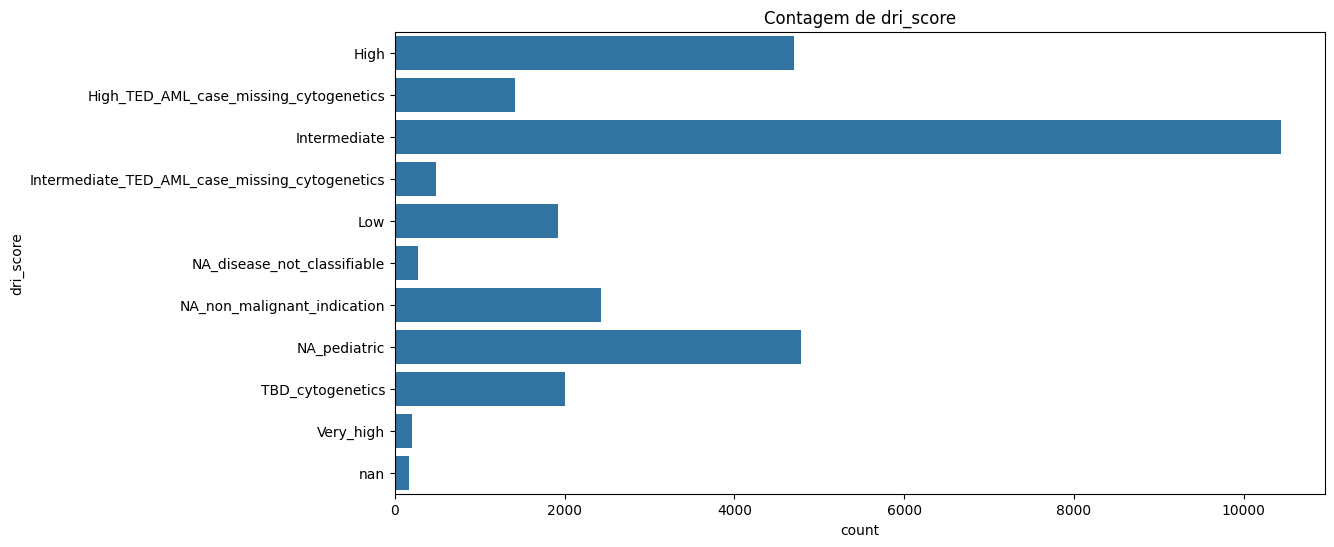

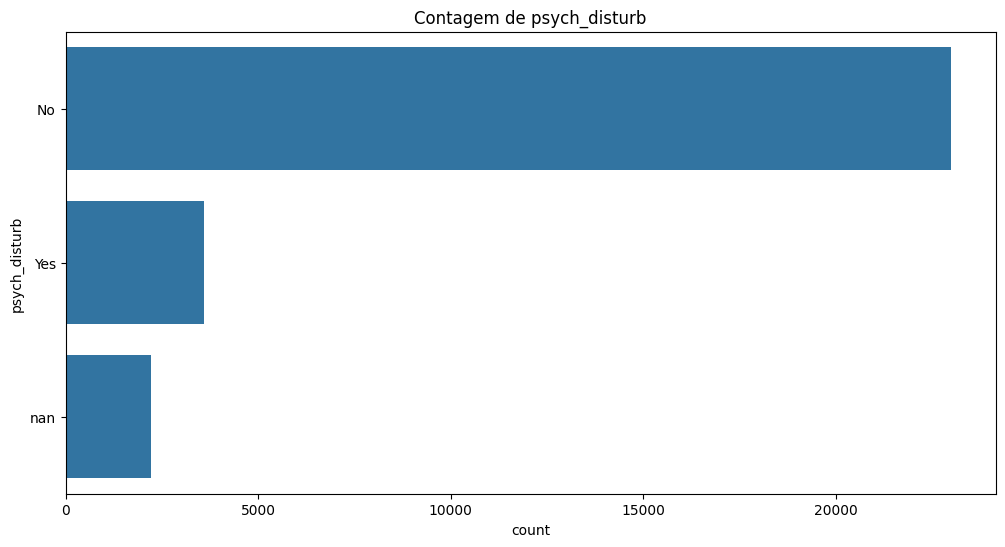

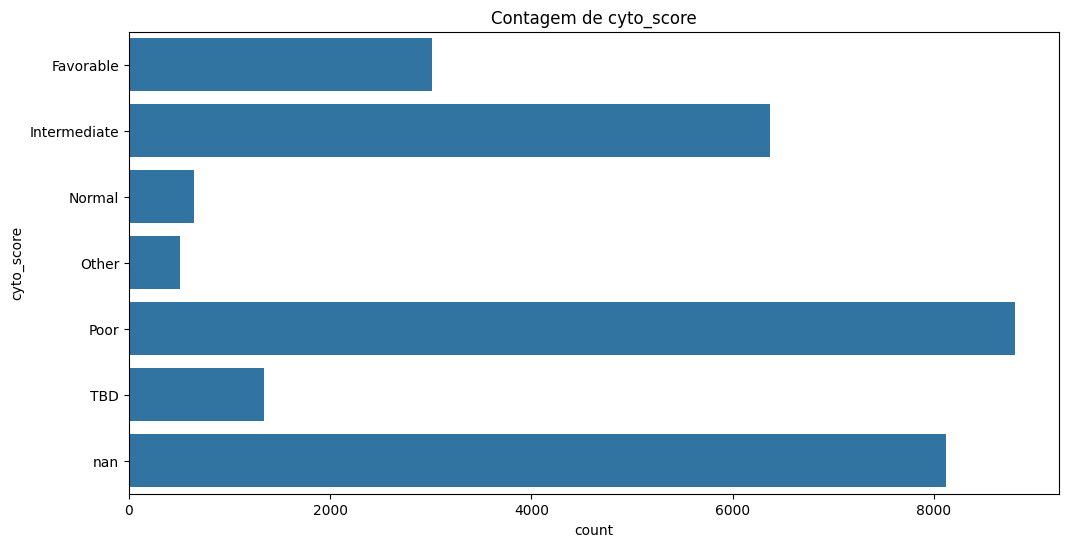

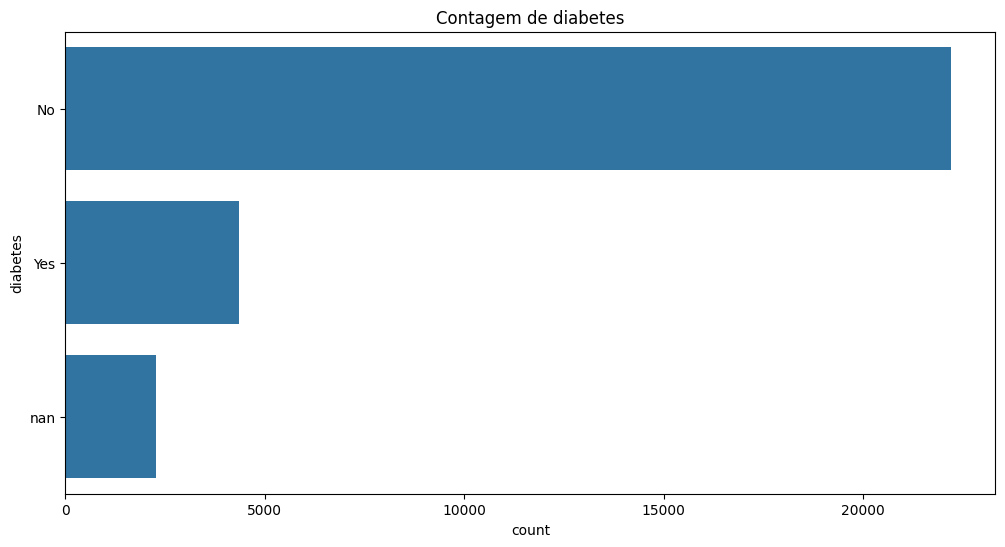

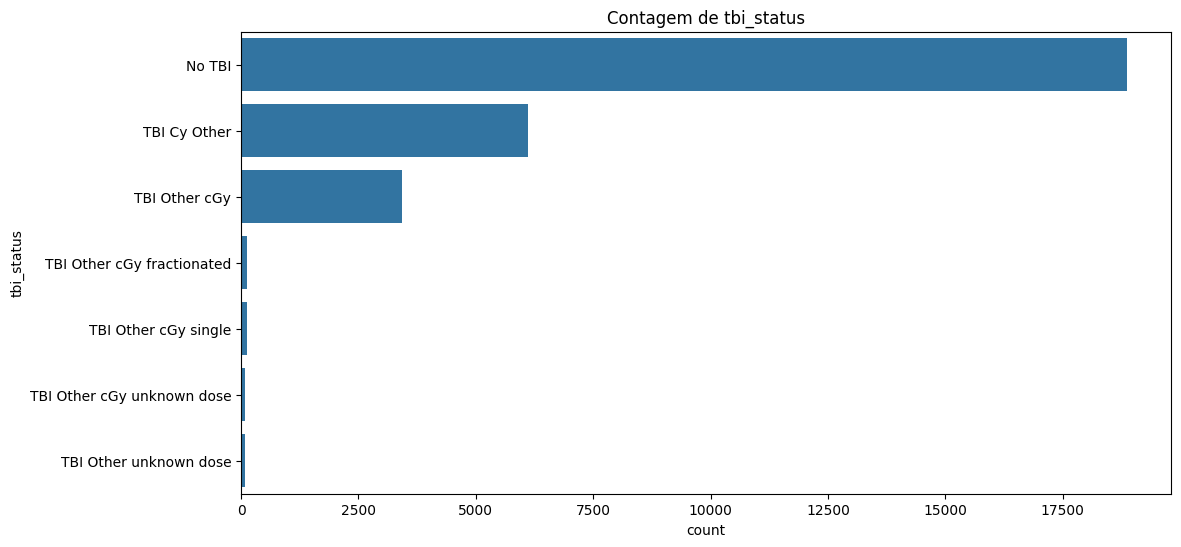

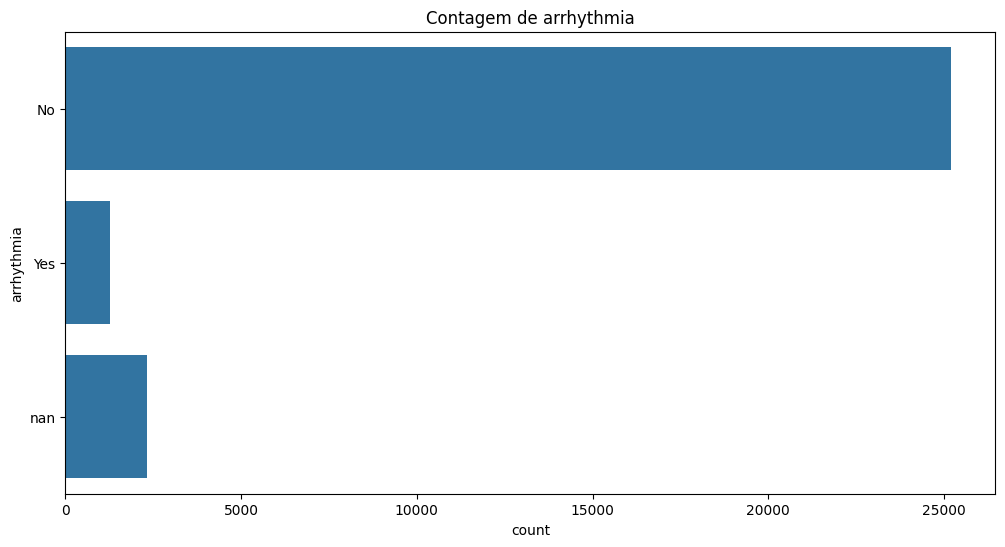

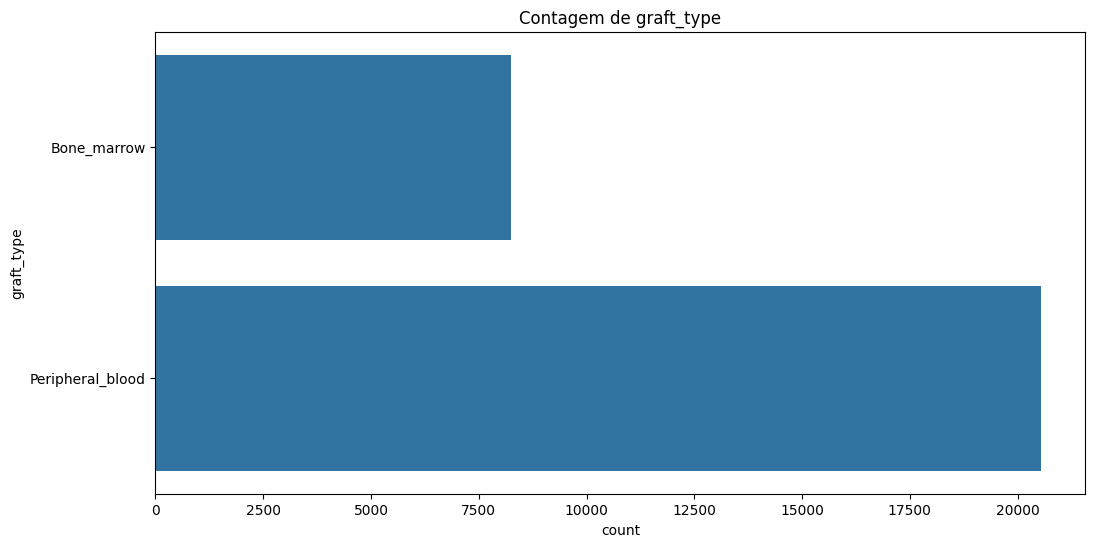

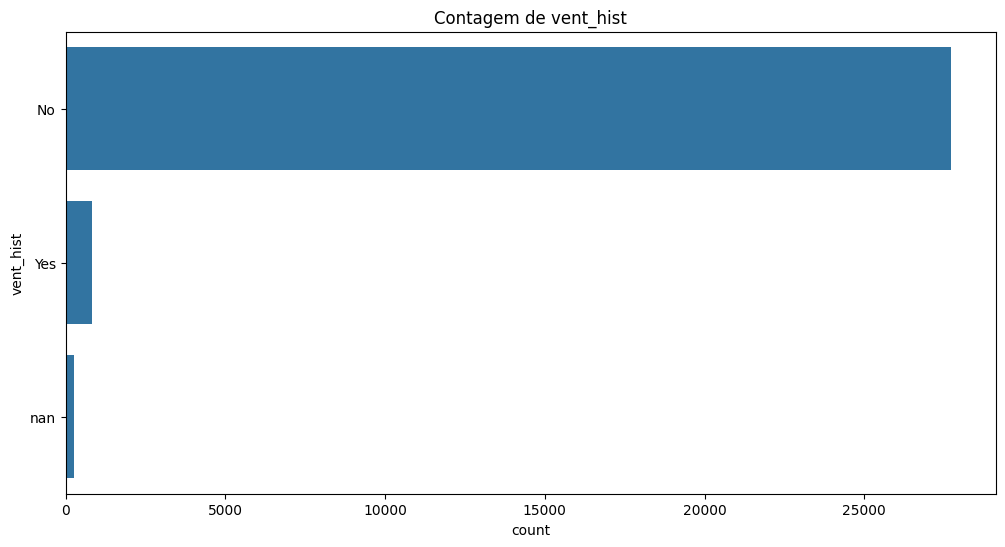

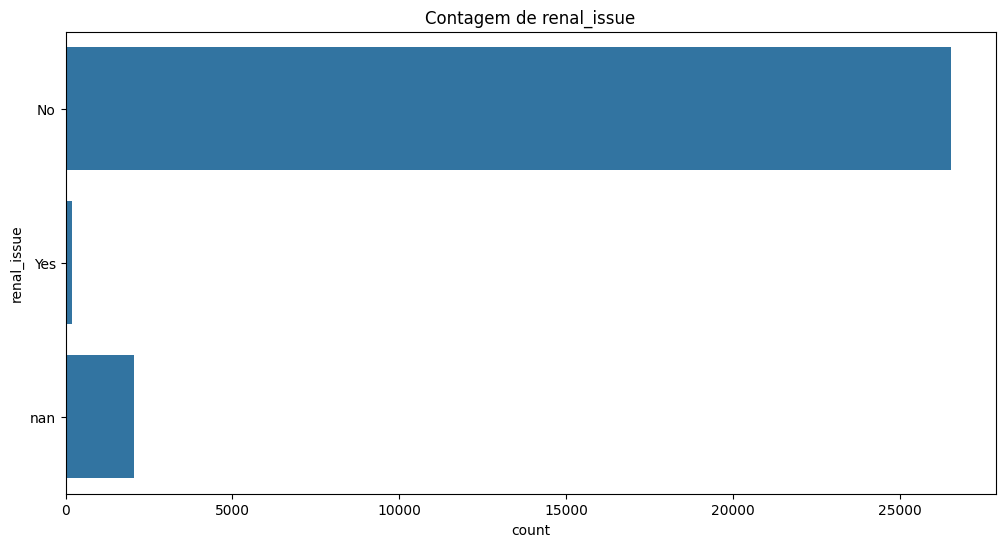

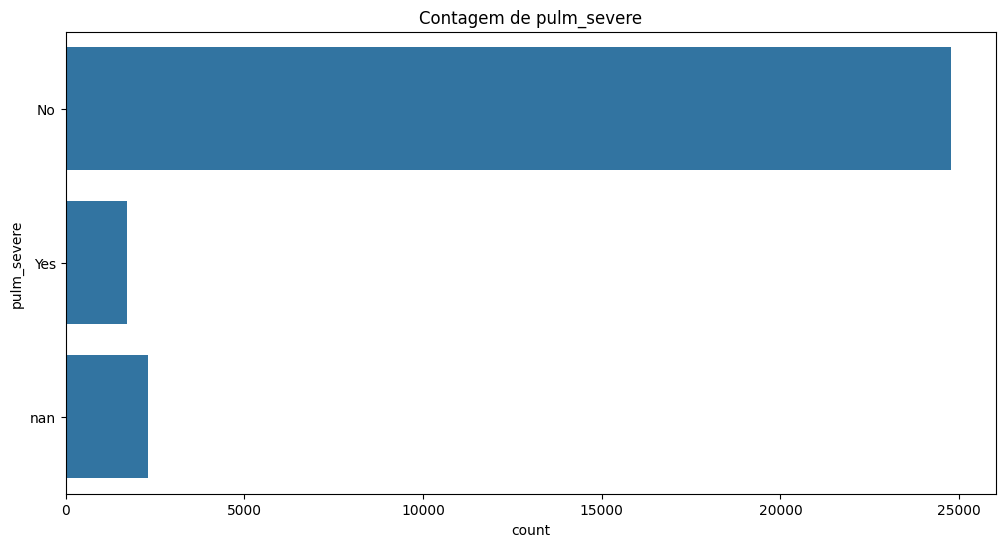

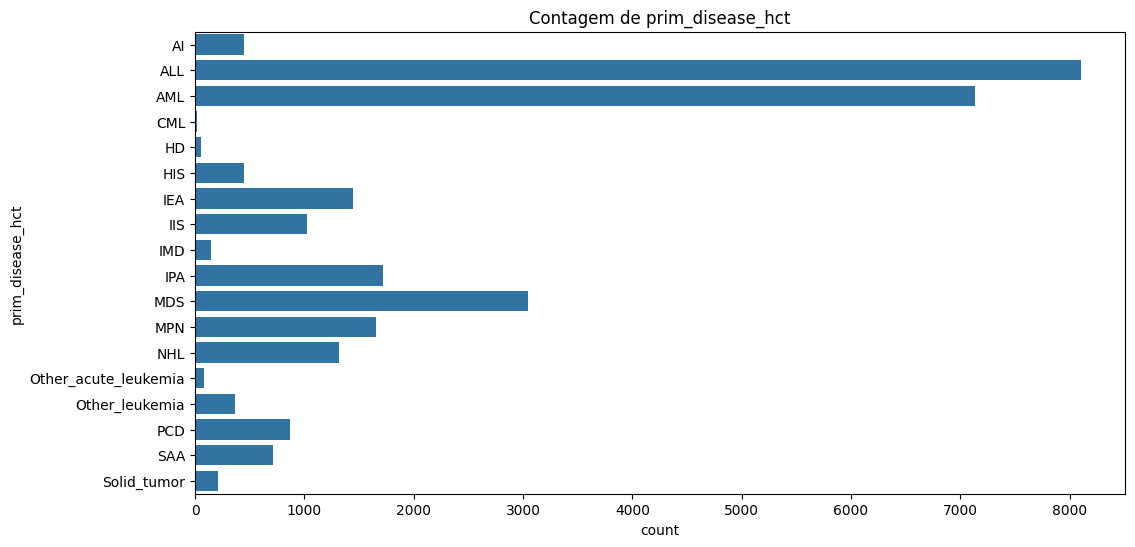

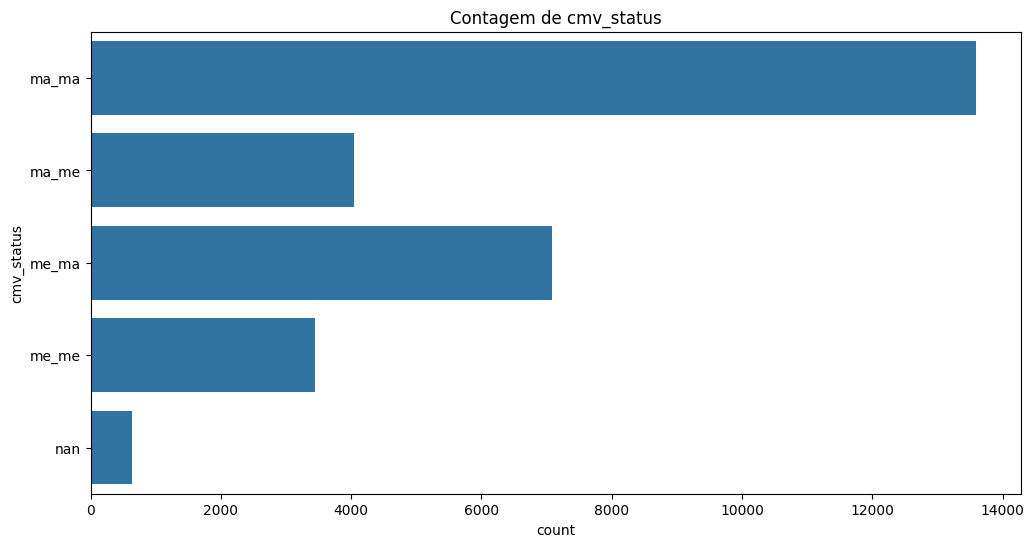

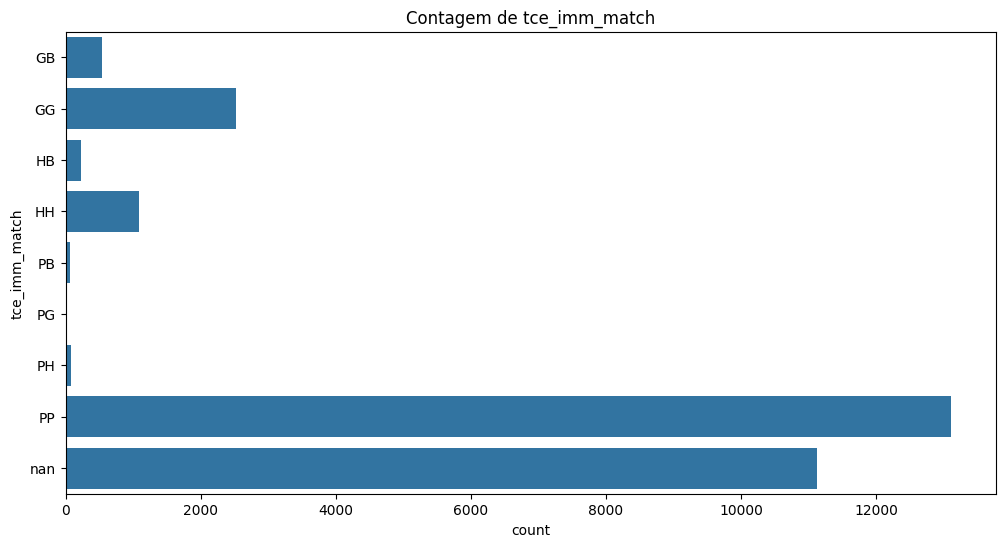

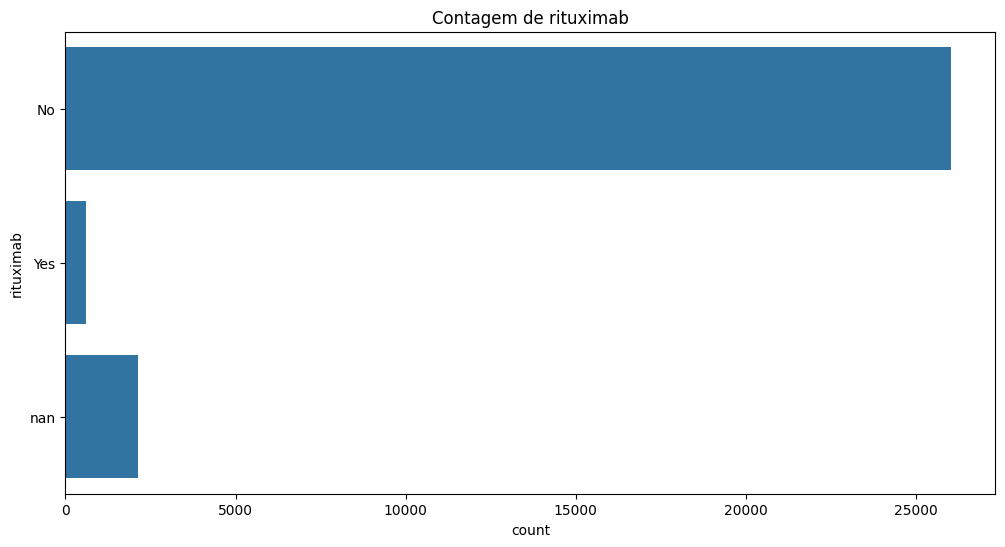

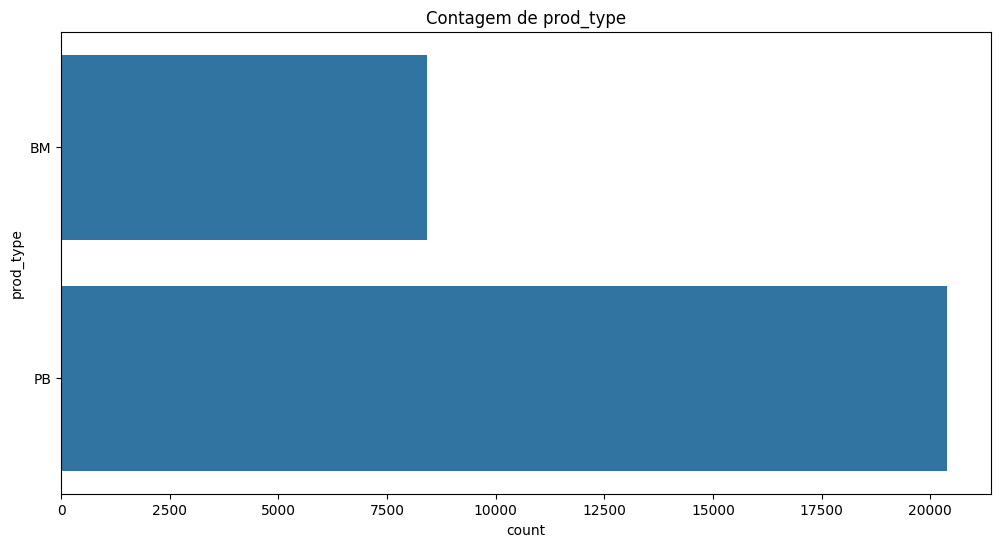

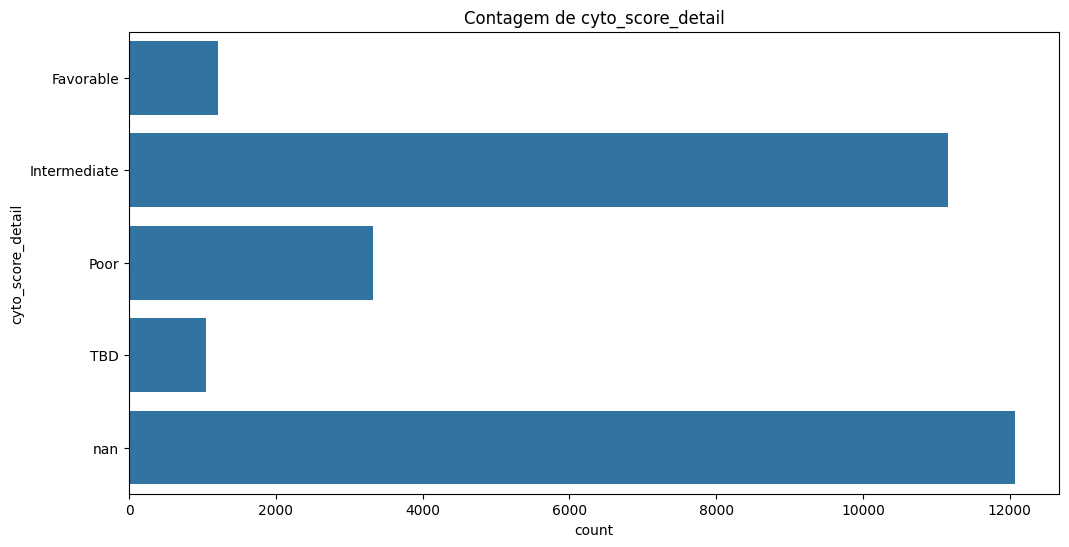

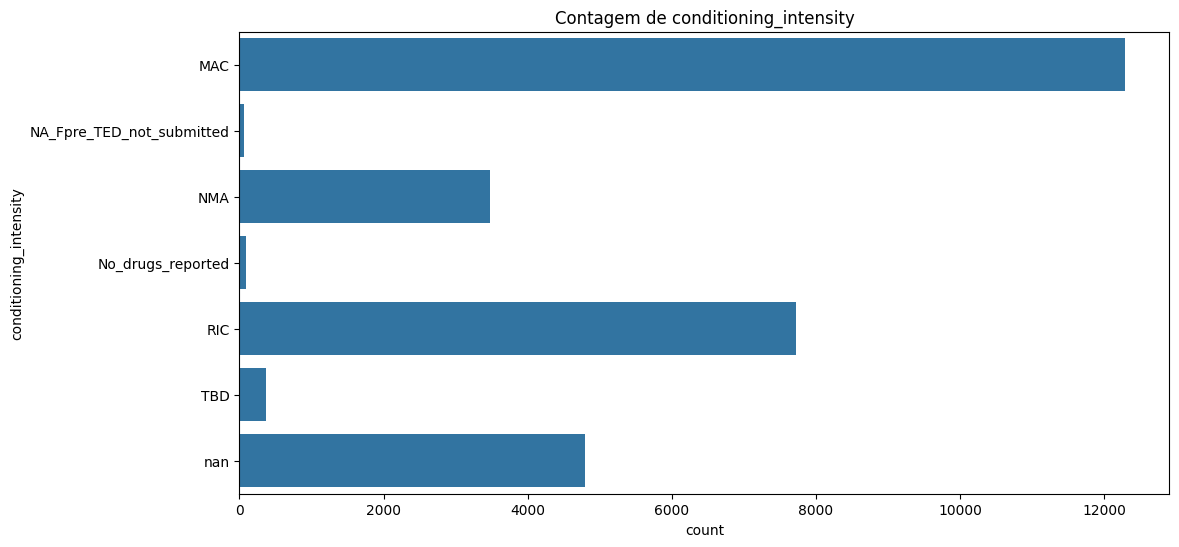

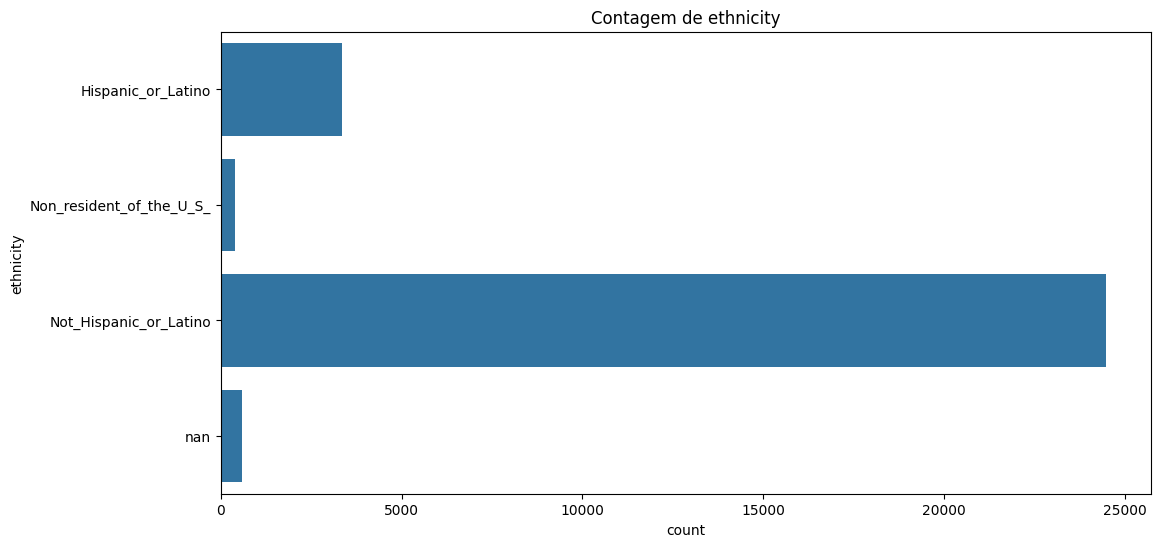

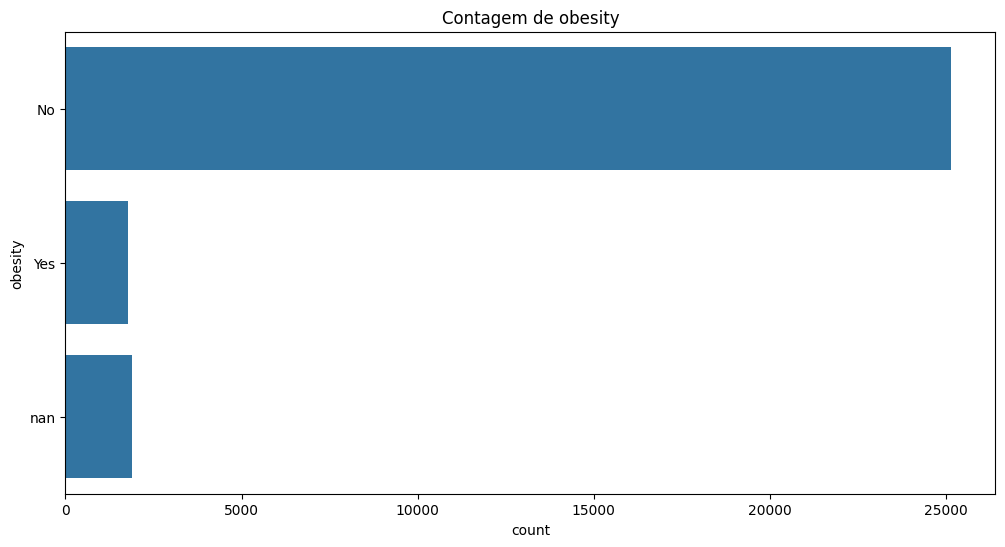

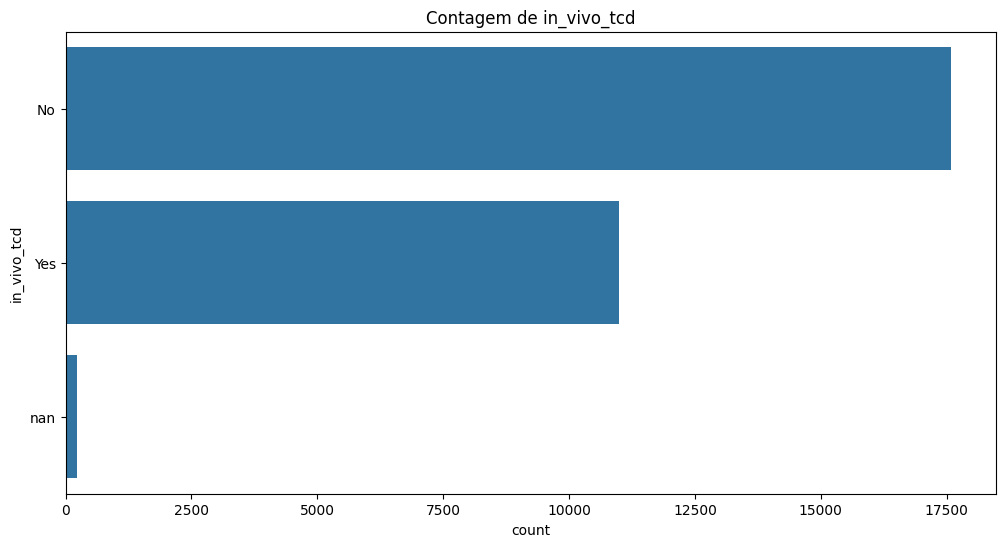

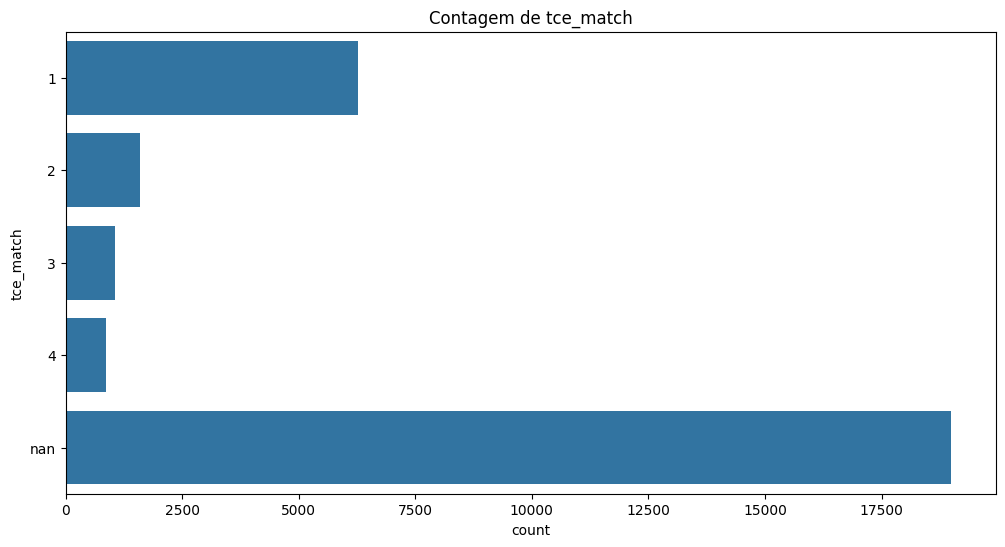

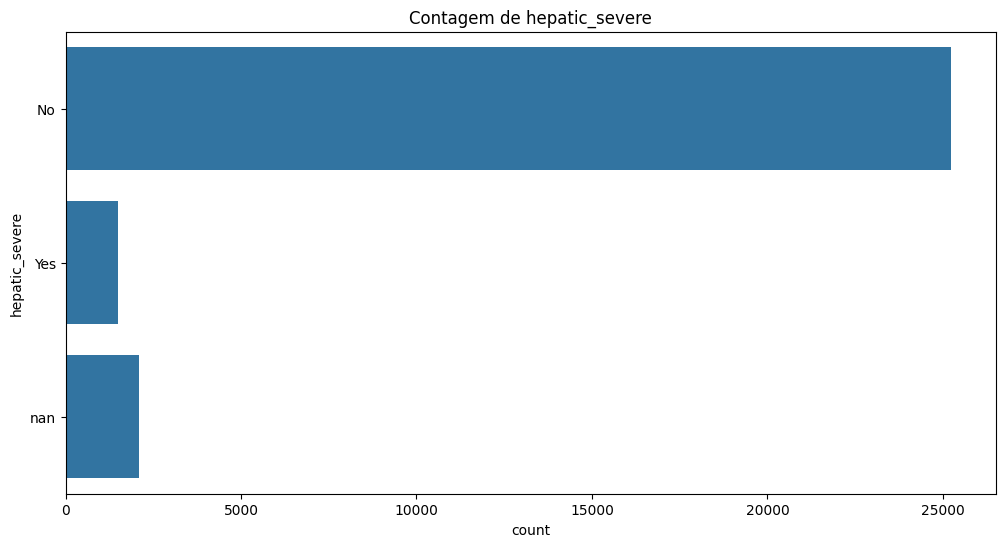

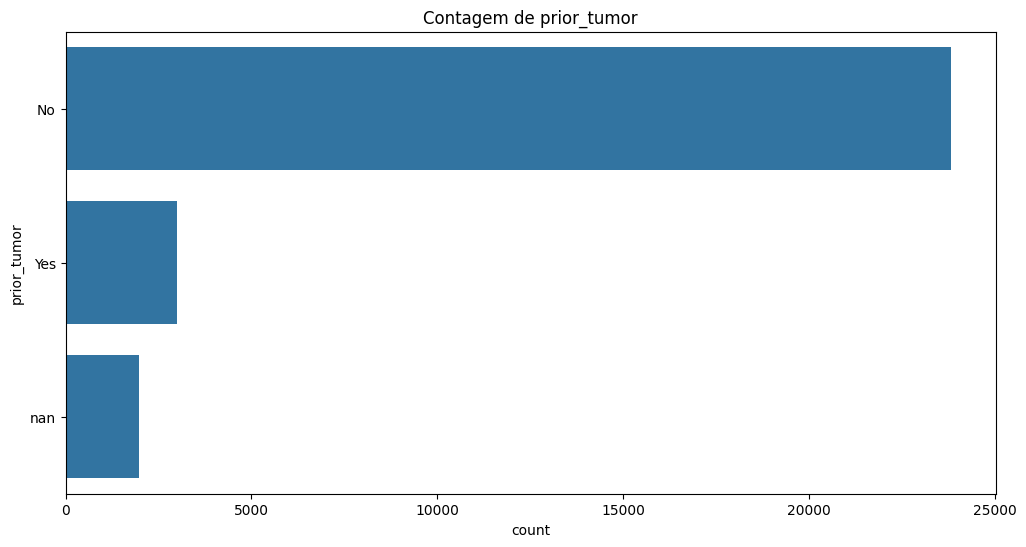

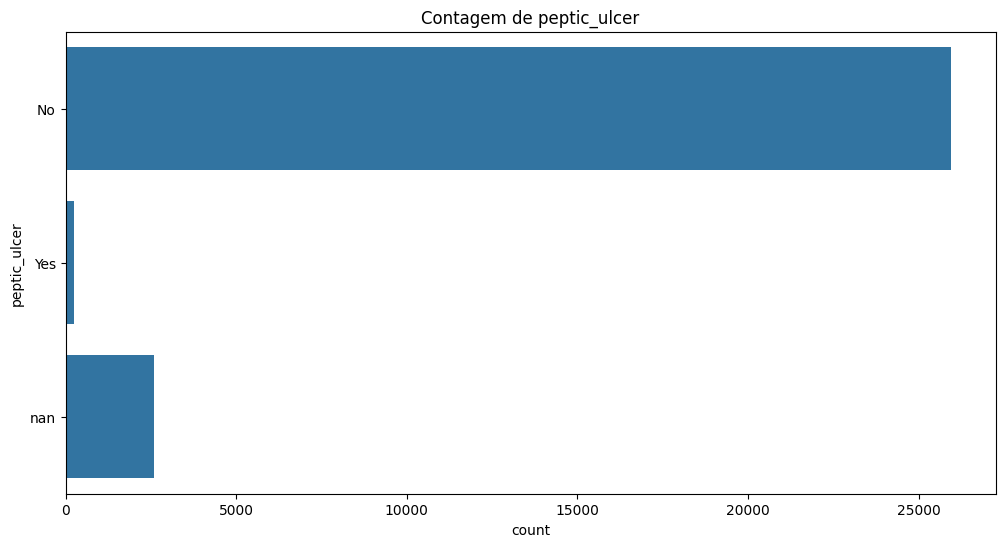

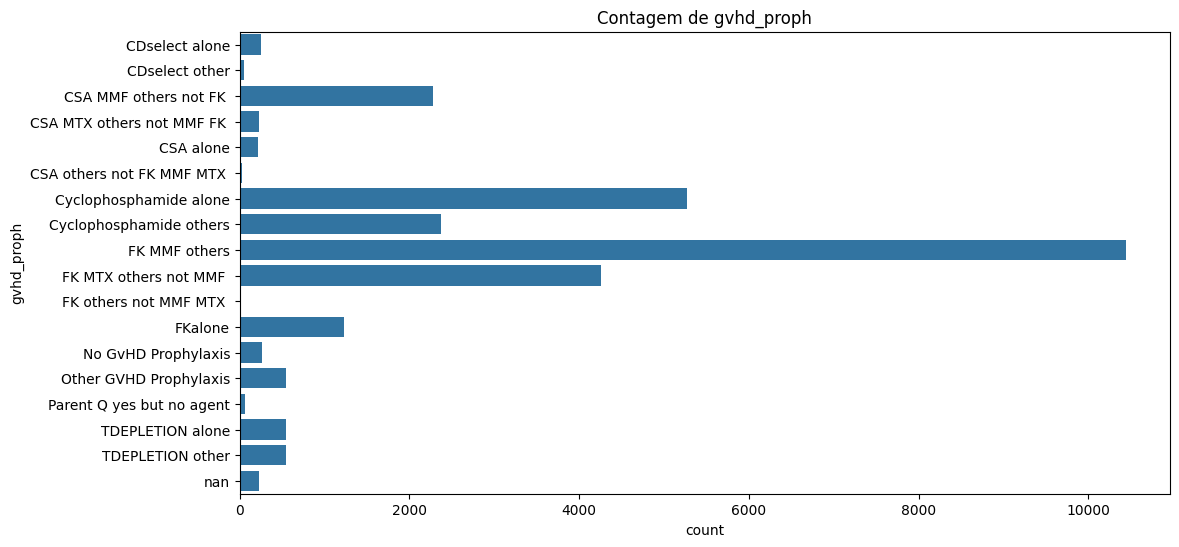

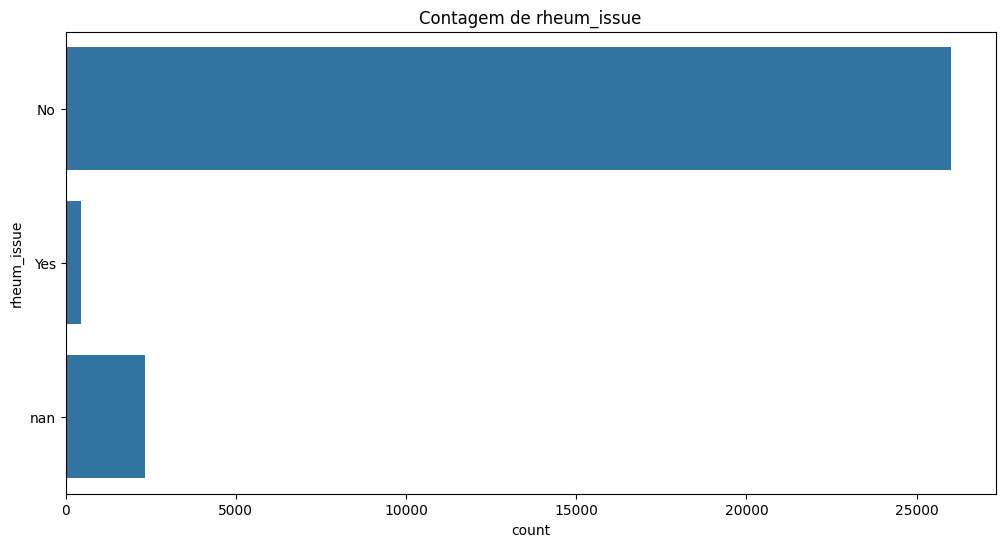

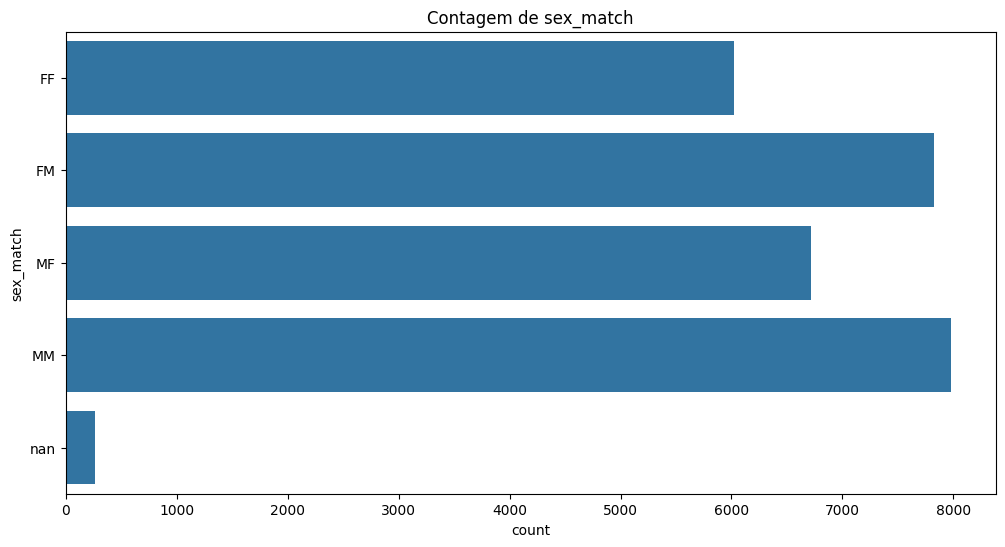

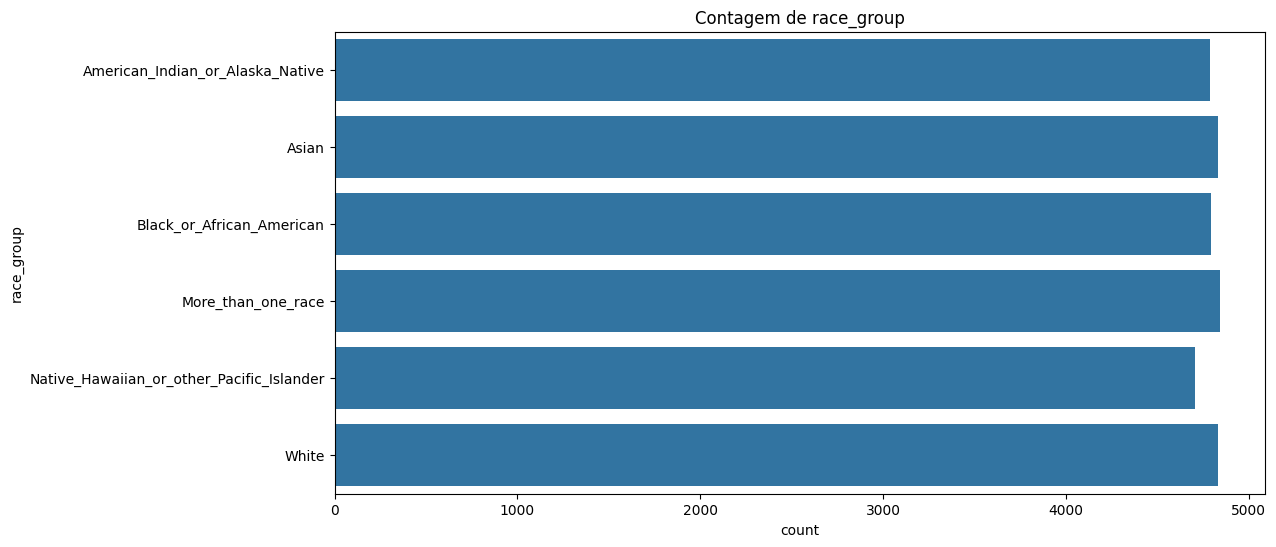

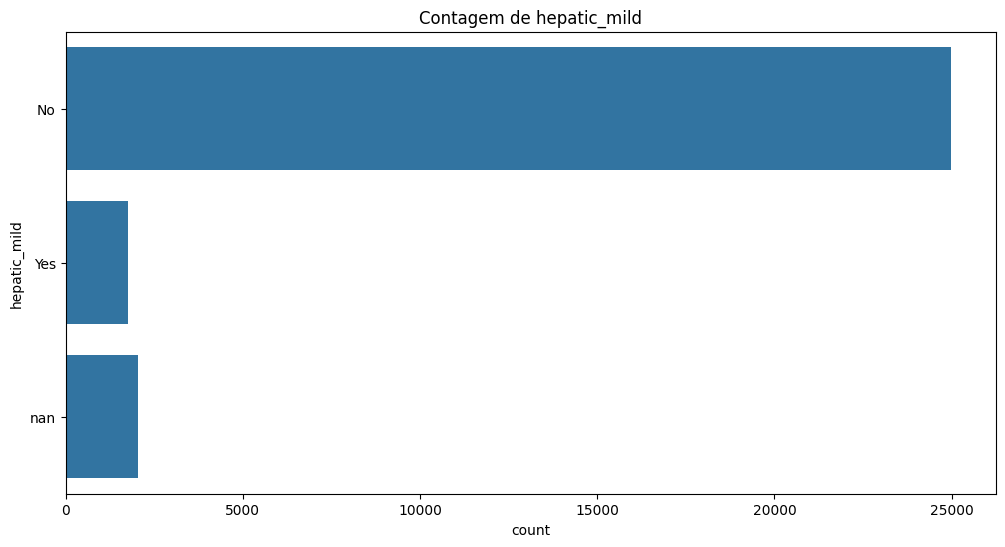

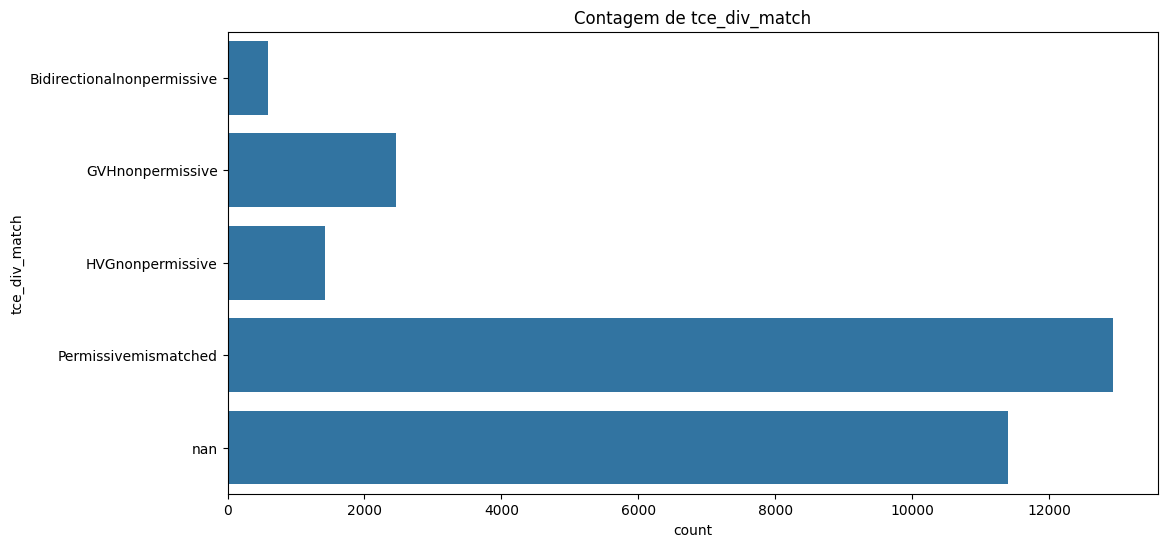

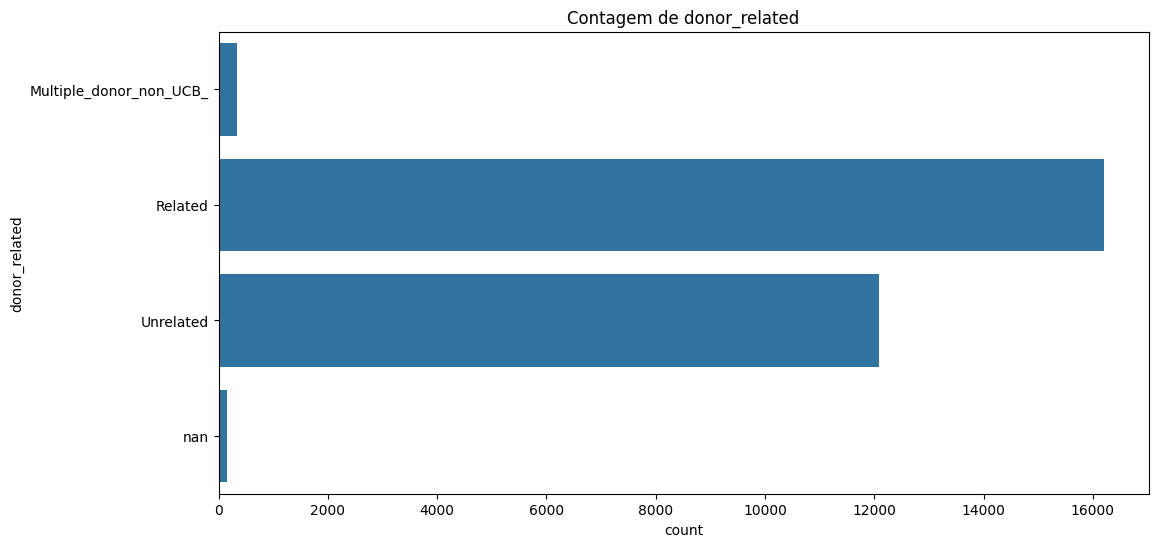

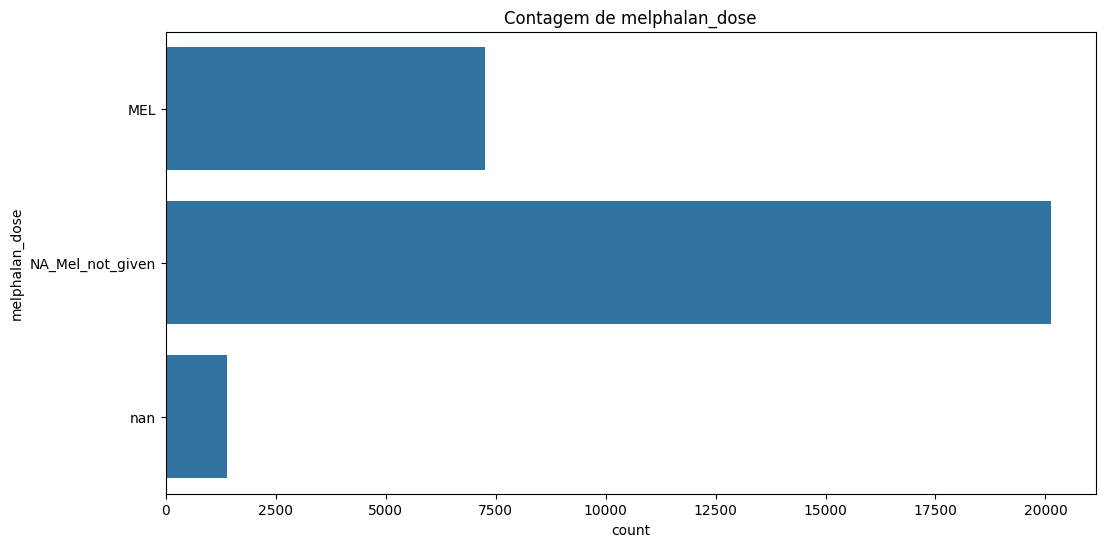

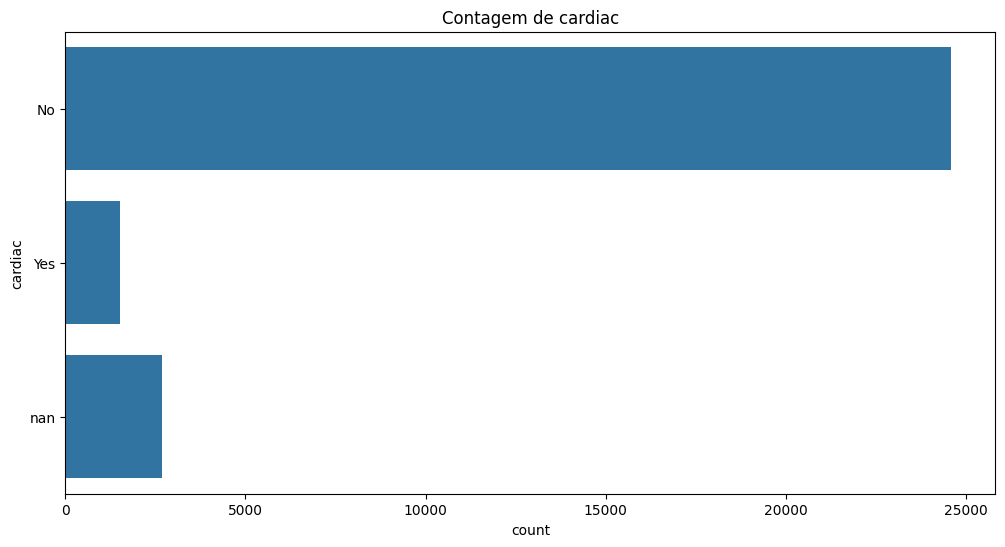

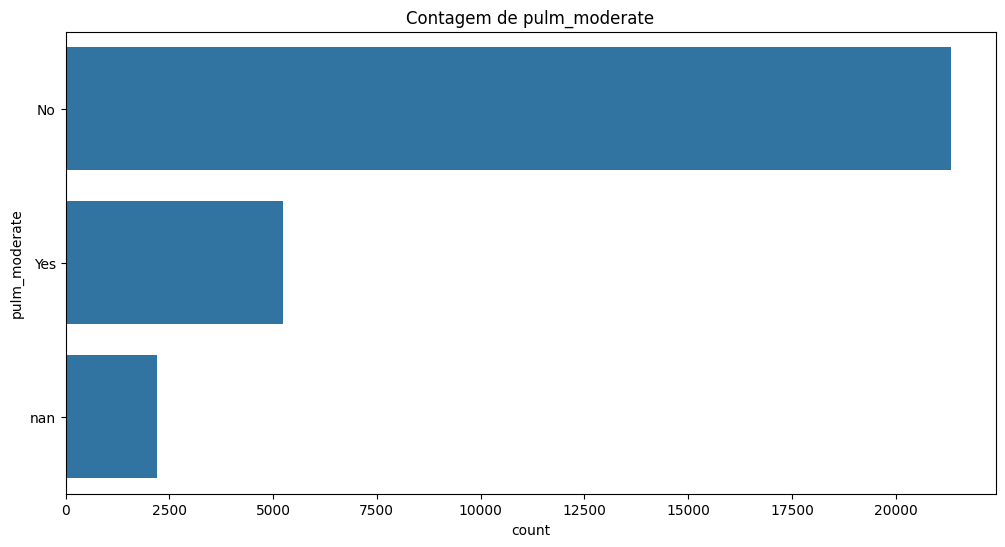

In [8]:
# Gráficos de barra para variáveis categóricas
for col in df_imputed_df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df_imputed_df[col].sort_values())
    plt.title(f'Contagem de {col}')
    plt.show()

In [12]:
# Exportar para Excel usando xlsxwriter
df_imputed_df.to_excel('df_combined.xlsx', index=False, engine='xlsxwriter')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Preparar os dados para o modelo
X = df_imputed_df.drop('efs', axis=1)
y = df_imputed_df['efs']

# Treinar o modelo de RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Obter a importância das variáveis
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plotar a importância das variáveis
plt.figure(figsize=(15, 10))
plt.title("Importância das Variáveis")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()


In [ ]:
# Mapa de Calor (Heatmap) para variáveis numéricas
plt.figure(figsize=(16, 10))
sns.heatmap(df_imputed_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()